# Finite difference solution

In [36]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1:

Using the formula below, fill in the missing dt variable. Set up an array u0 of size nx, ny with temperature Tcool. You may use this as a reference to create the initial array: https://numpy.org/doc/stable/reference/routines.array-creation.html

<img src="files/tests/time.png">

In [37]:
w = h = 10. # plate size, mm

dx = dy = 0.1 # intervals in x-, y- directions, mm

D = 4. # Thermal diffusivity of steel, mm2.s-1

Tcool, Thot = 300, 700  #end and start temperatures

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = (1/(2*D))*dx2*dy2/(dx2+dy2)

u0 = np.full((nx, ny), Tcool)

u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

### Task 2:

Complete the time_step function implementing the provided formula. Using for loop is sufficient to do this, however if you would like to experiment with large number of times steps you would need to use array slicing. When doing the calculations, leave out the outermost rows and columns to serve as boundaries.

<img src="files/tests/2d.png">

In [38]:
def time_step(u0, u):
    #Task 2
   
    return u0, u

After completing the time_step function first run the simulation with these current settings to pass the test case. After that you can change the number of steps and the times when you would like to plot the graphs. 

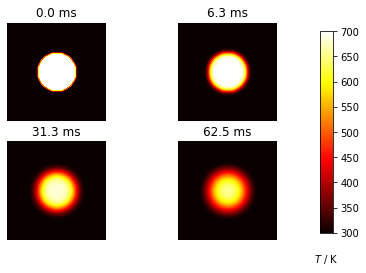

In [39]:
# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()

for m in range(nsteps):
    u0, u = time_step(u0, u)
    if m in mfig:
        fignum += 1
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
        
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

Run this test case after running the simulation above.

In [40]:
result = np.loadtxt("tests/testsolve1.txt")
if (np.array_equal(u0, result)):
    print("Passed testcase 1")
else:
    print("Failed testcase 1")

Passed testcase 1


This exercise was adapted from scipython.com Chapter 7.